<a href="https://colab.research.google.com/github/Storm00212/Introduction-to-machine-learning-models/blob/main/A_slightly_more_complex_neural_network_showing_the_effect_of_layers_in_a_neural_network%2Cdata_splitting_and_data_cleanup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Complex Neural Networks**

> Diving deeper into neural network workflow


In this section we will look at the full professional workflow of creating a neural network.

We will look at how data is cleaned and preprocessed to train a neural network.

We will also look at how neural network layers affect training of the model, exploring concepts like underfitting and overfitting, let us take a deep dive into this.

In [4]:

# Importing libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Next we will create some sample data for our neural network.

In [6]:
# 2. Generate Synthetic Data (y = 2x + 1 + noise)
np.random.seed(42)  # for reproducibility
x = np.linspace(-10, 10, 200)
y = 2 * x + 1 + np.random.randn(*x.shape) * 4  # Linear pattern with noise

# We will now perform cleaning of data. This prepares data for our model,cleaning corrpupted data thus enabling the model to learn using high quality data hence improving model predictions.

In [8]:
# 3. Data Cleaning
# Define upper and lower bounds based on z-score-like filtering
y_mean, y_std = np.mean(y), np.std(y) #used mean and standard deviation as our method for cleanup
mask = (y > y_mean - 2 * y_std) & (y < y_mean + 2 * y_std)
x_clean, y_clean = x[mask], y[mask]

print(f"Original samples: {len(x)}, After cleaning: {len(x_clean)}")

Original samples: 200, After cleaning: 198


# Step 2: Reshape Data for Keras
# Keras expects input of shape (samples, features)
# We currently have x.shape = (200,) that is an array of 200 samples
# So we reshape it to (200, 1) 200 samples and 1 feature
# Think of it as this 200 rows 1 column, that is what we need to give to keras.
# For additional feature parameters you can add more 'columns' eg (200, 3) 200 rows 3 columns.

In [9]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

#  Step 3: Split Data
# We divide the dataset into training (80%) and testing (20%)
# This ensures the model is evaluated on unseen data

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Let us now visualise the testing data and training data.

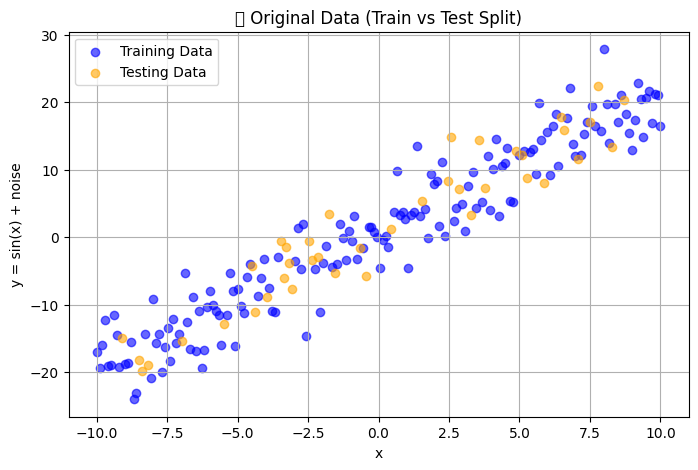

In [13]:
plt.figure(figsize=(8,5))
plt.scatter(x_train, y_train, label='Training Data', color='blue', alpha=0.6)
plt.scatter(x_test, y_test, label='Testing Data', color='orange', alpha=0.6)
plt.title(" Original Data (Train vs Test Split)")
plt.xlabel("x")
plt.ylabel("y = sin(x) + noise")
plt.legend()
plt.grid(True)
plt.show()